In [23]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

rest_android = pd.read_csv("../../data_files/data_from_android_api/rest_25_mins.csv")

forward_android1 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_1.csv")
forward_android2 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_2.csv")
forward_android3 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_3.csv")
forward_android4 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_4.csv")
forward_android5 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_5.csv")

forward = pd.concat([forward_android1, forward_android2, forward_android3, forward_android4, forward_android5])

dataDF = pd.concat([rest_android, forward])

In [24]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
labels = encoder.fit_transform(dataDF.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels)

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_250 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_251 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_252 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_253 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_254 (Dense)            (None, 1)                 33        
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________
Train on

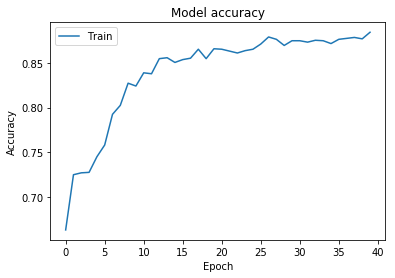

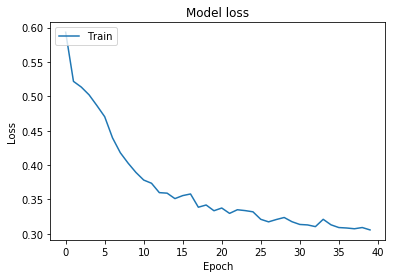

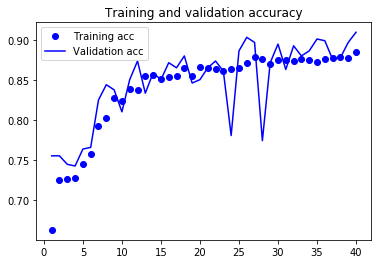

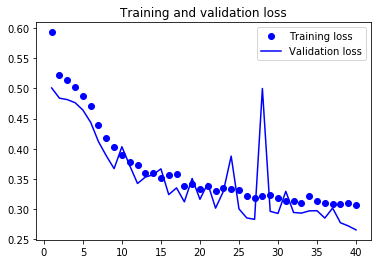

In [80]:
from keras import models
from keras import layers
# from keras import regularizers kernel_regularizer=regularizers.l2(0.01), 
from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(32, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(32, activation="sigmoid"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer=Adam(lr=0.00038),
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train, validation_split=0.2,
                      epochs=40, verbose=1, batch_size=3)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

# print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Manual data split

In [6]:
rest_android = pd.read_csv("../../data_files/data_from_android_api/rest_25_mins.csv")

forward_android1 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_1.csv")
forward_android2 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_2.csv")
forward_android3 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_3.csv")
forward_android4 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_4.csv")
forward_android5 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_5.csv")

forward = pd.concat([forward_android1, forward_android2, forward_android3, forward_android4, forward_android5])

dataDF = pd.concat([rest_android, forward])

In [7]:
trainR = rest_android.iloc[:1235,:]
trainF = forward
train = pd.concat([trainR, trainF])

In [8]:
testR = rest_android.iloc[1235:,:]
testF = forward_android5
test = pd.concat([testR, testF])

In [9]:
train_labels = train.action.values
test_labels = test.action.values

encoder = LabelBinarizer()
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.fit_transform(test_labels)

In [10]:
# create an array of shape 30706, 9 = number of records by the features
train_data = np.array([[0 for x in range(8)] for y in range(len(train))])
for i in range(len(train)):
    train_data[i] = [train.delta.values[i],
                       train.theta.values[i],
                       train.alphaLow.values[i],
                       train.alphaHigh.values[i],
                       train.betaLow.values[i],
                       train.betaHigh.values[i],
                       train.gammaLow.values[i],
                       train.gammaMid.values[i]]
    
    # create an array of shape 30706, 9 = number of records by the features
test_data = np.array([[0 for x in range(8)] for y in range(len(test))])
for i in range(len(test)):
    test_data[i] = [test.delta.values[i],
                       test.theta.values[i],
                       test.alphaLow.values[i],
                       test.alphaHigh.values[i],
                       test.betaLow.values[i],
                       test.betaHigh.values[i],
                       test.gammaLow.values[i],
                       test.gammaMid.values[i]]

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_255 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_256 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_257 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_258 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_259 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_260 (Dense)            (None, 1)                 33        
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________
Train on

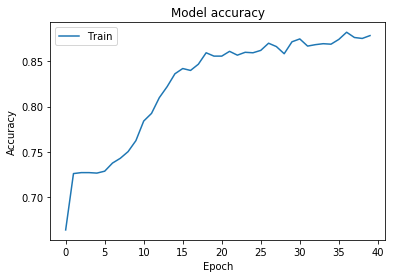

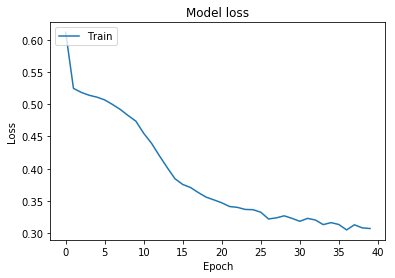

In [81]:
from keras import models
from keras import layers
from keras import regularizers

from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(32, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(16, activation="relu"))
# network.add(layers.Dropout(0.3))
network.add(layers.Dense(16, activation="relu"))
# network.add(layers.Dropout(0.3))
network.add(layers.Dense(32, activation="sigmoid"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer=Adam(lr=0.0004),
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train, validation_split=0.2,
                      epochs=40, verbose=1, batch_size=3)

loss_and_metrics = network.evaluate(test_data, test_labels)
print('loss and metrics', loss_and_metrics)

# print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# K-Folds Validation

In [83]:
rest_android = pd.read_csv("../../data_files/data_from_android_api/rest_25_mins.csv")

forward_android1 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_1.csv")
forward_android2 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_2.csv")
forward_android3 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_3.csv")
forward_android4 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_4.csv")
forward_android5 = pd.read_csv("../../data_files/data_from_android_api/forward_5mins_5.csv")

forward = pd.concat([forward_android1, forward_android2, forward_android3, forward_android4])

dataDF = pd.concat([rest_android, forward, forward_android5])

In [85]:
all_labels = dataDF.action.values

encoder = LabelBinarizer()
all_labels = encoder.fit_transform(all_labels)
    
# create an array of shape 30706, 9 = number of records by the features
all_data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    all_data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

all_data = scaler.fit_transform(all_data)




/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [88]:

from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=10, random_state=12)
avg_loss = []
avg_acc = []
# Loop through the indices the split() method returns
for index, (train_index, test_index) in enumerate(skf.split(all_data, all_labels)):
    print("Training on fold " + str(index + 1) + "/10.............................................")
    # Generate batches from indices
    x_train, x_test = all_data[train_index], all_data[test_index]
    # use one-hot vectors as labels
    y_train, y_test = all_labels[train_index], all_labels[test_index]

    network = models.Sequential()
    

    network.add(layers.Dense(32, input_shape=(8,)))
    network.add(layers.Dense(32, activation="relu"))
    network.add(layers.Dense(16, activation="relu"))
    # network.add(layers.Dropout(0.3))
    network.add(layers.Dense(16, activation="relu"))
    # network.add(layers.Dropout(0.3))
    network.add(layers.Dense(32, activation="sigmoid"))
    network.add(layers.Dense(1, activation='sigmoid'))

    # Adam = Adam(lr=0.05)
    network.compile(optimizer=Adam(lr=0.0004),
                    loss='binary_crossentropy',
                    metrics=['acc'])

    network.summary()

    history = network.fit(x_train, y_train, validation_split=0.2,
                          epochs=40, verbose=1, batch_size=3)

    loss, accuracy = network.evaluate(x_test, y_test)

    # evaluate and store the accuracy
#     loss, accuracy = model.evaluate(xtest_imagelist, ytest, verbose=1)
    avg_loss.append(loss)
    avg_acc.append(accuracy)

    # cross validation score
    print("Average accuracy of model on the dev set = ", np.mean(avg_acc))

Training on fold 1/10.............................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_261 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_262 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_263 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_264 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_265 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_266 (Dense)            (None, 1)                 33        
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_______

2272/2272 [==============================] - 2s 815us/step - loss: 0.4881 - acc: 0.7311 - val_loss: 0.6867 - val_acc: 0.3873
Epoch 13/40
2272/2272 [==============================] - 2s 810us/step - loss: 0.4868 - acc: 0.7372 - val_loss: 0.7180 - val_acc: 0.3873
Epoch 14/40
2272/2272 [==============================] - 2s 818us/step - loss: 0.4850 - acc: 0.7337 - val_loss: 0.6032 - val_acc: 0.4331
Epoch 15/40
2272/2272 [==============================] - 2s 823us/step - loss: 0.4833 - acc: 0.7456 - val_loss: 0.5733 - val_acc: 0.5141
Epoch 16/40
2272/2272 [==============================] - 2s 825us/step - loss: 0.4812 - acc: 0.7403 - val_loss: 0.6454 - val_acc: 0.4261
Epoch 17/40
2272/2272 [==============================] - 2s 825us/step - loss: 0.4779 - acc: 0.7526 - val_loss: 0.6053 - val_acc: 0.5581
Epoch 18/40
2272/2272 [==============================] - 2s 810us/step - loss: 0.4736 - acc: 0.7641 - val_loss: 0.5857 - val_acc: 0.5827
Epoch 19/40
2272/2272 [==============================

2272/2272 [==============================] - 2s 860us/step - loss: 0.3795 - acc: 0.8349 - val_loss: 0.2876 - val_acc: 0.8398
Epoch 23/40
2272/2272 [==============================] - 2s 839us/step - loss: 0.3756 - acc: 0.8455 - val_loss: 0.4547 - val_acc: 0.7482
Epoch 24/40
2272/2272 [==============================] - 2s 869us/step - loss: 0.3754 - acc: 0.8446 - val_loss: 0.3374 - val_acc: 0.8292
Epoch 25/40
2272/2272 [==============================] - 2s 867us/step - loss: 0.3683 - acc: 0.8464 - val_loss: 0.2728 - val_acc: 0.8768
Epoch 26/40
2272/2272 [==============================] - 2s 844us/step - loss: 0.3692 - acc: 0.8446 - val_loss: 0.3533 - val_acc: 0.8046
Epoch 27/40
2272/2272 [==============================] - 2s 851us/step - loss: 0.3657 - acc: 0.8495 - val_loss: 0.4264 - val_acc: 0.7570
Epoch 28/40
2272/2272 [==============================] - 2s 830us/step - loss: 0.3579 - acc: 0.8508 - val_loss: 0.3293 - val_acc: 0.8398
Epoch 29/40
2272/2272 [==============================

Train on 2272 samples, validate on 569 samples
Epoch 1/40
2272/2272 [==============================] - 5s 2ms/step - loss: 0.5877 - acc: 0.6857 - val_loss: 0.6957 - val_acc: 0.4710
Epoch 2/40
2272/2272 [==============================] - 2s 811us/step - loss: 0.5086 - acc: 0.7262 - val_loss: 0.7189 - val_acc: 0.3691
Epoch 3/40
2272/2272 [==============================] - 2s 808us/step - loss: 0.5039 - acc: 0.7306 - val_loss: 0.6616 - val_acc: 0.5009
Epoch 4/40
2272/2272 [==============================] - 2s 820us/step - loss: 0.5005 - acc: 0.7311 - val_loss: 0.6900 - val_acc: 0.3849
Epoch 5/40
2272/2272 [==============================] - 2s 814us/step - loss: 0.4975 - acc: 0.7368 - val_loss: 0.5982 - val_acc: 0.7065
Epoch 6/40
2272/2272 [==============================] - 2s 815us/step - loss: 0.4960 - acc: 0.7364 - val_loss: 0.5832 - val_acc: 0.6977
Epoch 7/40
2272/2272 [==============================] - 2s 822us/step - loss: 0.4928 - acc: 0.7487 - val_loss: 0.6770 - val_acc: 0.5395
Epo

Epoch 11/40
2272/2272 [==============================] - 2s 835us/step - loss: 0.3834 - acc: 0.8376 - val_loss: 0.4517 - val_acc: 0.7487
Epoch 12/40
2272/2272 [==============================] - 2s 861us/step - loss: 0.3801 - acc: 0.8393 - val_loss: 0.3403 - val_acc: 0.8436
Epoch 13/40
2272/2272 [==============================] - 2s 842us/step - loss: 0.3691 - acc: 0.8482 - val_loss: 0.3735 - val_acc: 0.8120
Epoch 14/40
2272/2272 [==============================] - 2s 833us/step - loss: 0.3667 - acc: 0.8438 - val_loss: 0.2270 - val_acc: 0.9209
Epoch 15/40
2272/2272 [==============================] - 2s 824us/step - loss: 0.3575 - acc: 0.8561 - val_loss: 0.3147 - val_acc: 0.8506
Epoch 16/40
2272/2272 [==============================] - 2s 835us/step - loss: 0.3502 - acc: 0.8556 - val_loss: 0.2255 - val_acc: 0.8981
Epoch 17/40
2272/2272 [==============================] - 2s 830us/step - loss: 0.3487 - acc: 0.8574 - val_loss: 0.3811 - val_acc: 0.8383
Epoch 18/40
2272/2272 [==================

Epoch 21/40
2272/2272 [==============================] - 2s 846us/step - loss: 0.3966 - acc: 0.8266 - val_loss: 0.3820 - val_acc: 0.7996
Epoch 22/40
2272/2272 [==============================] - 2s 837us/step - loss: 0.3820 - acc: 0.8319 - val_loss: 0.3320 - val_acc: 0.8418
Epoch 23/40
2272/2272 [==============================] - 2s 888us/step - loss: 0.3775 - acc: 0.8415 - val_loss: 0.4869 - val_acc: 0.7522
Epoch 24/40
2272/2272 [==============================] - 2s 861us/step - loss: 0.3710 - acc: 0.8455 - val_loss: 0.2964 - val_acc: 0.8770
Epoch 25/40
2272/2272 [==============================] - 2s 835us/step - loss: 0.3626 - acc: 0.8539 - val_loss: 0.3561 - val_acc: 0.8207
Epoch 26/40
2272/2272 [==============================] - 2s 858us/step - loss: 0.3613 - acc: 0.8534 - val_loss: 0.3770 - val_acc: 0.8155
Epoch 27/40
2272/2272 [==============================] - 2s 836us/step - loss: 0.3520 - acc: 0.8552 - val_loss: 0.3607 - val_acc: 0.8313
Epoch 28/40
2272/2272 [==================

Epoch 31/40
2272/2272 [==============================] - 2s 850us/step - loss: 0.3169 - acc: 0.8741 - val_loss: 0.2393 - val_acc: 0.9051
Epoch 32/40
2272/2272 [==============================] - 2s 859us/step - loss: 0.3150 - acc: 0.8759 - val_loss: 0.2497 - val_acc: 0.9033
Epoch 33/40
2272/2272 [==============================] - 2s 852us/step - loss: 0.3108 - acc: 0.8798 - val_loss: 0.4567 - val_acc: 0.8225
Epoch 34/40
2272/2272 [==============================] - 2s 846us/step - loss: 0.3128 - acc: 0.8763 - val_loss: 0.3592 - val_acc: 0.8682
Epoch 35/40
2272/2272 [==============================] - 2s 879us/step - loss: 0.3086 - acc: 0.8776 - val_loss: 0.2328 - val_acc: 0.9033
Epoch 36/40
2272/2272 [==============================] - 2s 853us/step - loss: 0.3012 - acc: 0.8842 - val_loss: 0.2236 - val_acc: 0.9174
Epoch 37/40
2272/2272 [==============================] - 2s 853us/step - loss: 0.3017 - acc: 0.8807 - val_loss: 0.2174 - val_acc: 0.9350
Epoch 38/40
2272/2272 [==================